In [14]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [15]:
results = 'results/'


In [16]:
configlist = []
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [17]:
results = 'results1/'
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [18]:
results = 'results2/'
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [19]:
config_df = pd.DataFrame(configlist)

In [20]:
config_df

,network,lr,episodes,gamma,algorithm,environment,experiment
0,11,0.0100,800,0.90,ac,lunarlander,results/experiment_l8qObg0My/rewards.csv
1,1,0.0010,10,0.95,dqn,lunarlander-discrete,results/experiment_NakH5qIUg/rewards.csv
2,11,0.0100,800,0.80,ac,lunarlander,results/experiment_2OHAnSUGn/rewards.csv
3,22,0.0010,800,0.95,ac,lunarlander,results/experiment_04pZp1OR3/rewards.csv
4,1,0.0100,300,0.90,dqn,lunarlander-discrete,results/experiment_ku4UWFFCd/rewards.csv
...,...,...,...,...,...,...,...
219,1,0.0005,300,0.80,dqn,lunarlander-discrete,results2/experiment_88EFfjUJ1/rewards.csv
220,2,0.0005,300,0.90,dqn,lunarlander-discrete,results2/experiment_LqnGKikg8/rewards.csv
221,1,0.0100,300,0.80,dqn,lunarlander-discrete,results2/experiment_sFsqC9ftj/rewards.csv
222,2,0.0001,600,0.80,dqn,lunarlander-discrete,results2/experiment_jN9e0qB8p/rewards.csv


In [8]:
# algo = 'dqn'

In [9]:
# config_df[(if algo config_df['algorithm'] == algo)
#           &(config_df['environment'].str.contains('lunar'))
#          &(config_df['episodes'] == 300)
#          &(config_df['lr'] == 0.0001)
#           &((config_df['network'] == 1))]

In [15]:
def slicer(df, algorithm = None, network=None, lr=None, episodes=None, gamma=None, environment=None, experiment=None):
    
    if network == 1:
        networks = [1, 11]
    elif network == 2:
        networks = [2, 22]
        
    if algorithm:
        df = df[df['algorithm'] == algorithm]
    if network:
        df = df[df['network'].isin(networks)]
    if lr:
        df = df[df['lr'] == lr]
    if episodes:
        df = df[df['episodes'] == episodes]
    if gamma:
        df = df[df['gamma'] == gamma]
    if environment:
        df = df[df['environment'].str.contains(environment)]
    if experiment:
        df = df[df['experiment'] == experiment]
        
    return df

In [11]:
# slicer(config_df, episodes = 800, algorithm='ac', network = 11, lr = 0.0001)

,network,lr,episodes,gamma,algorithm,environment,experiment
30,11,0.0001,800,0.9,ac,lunarlander,results/experiment_uY4aPjyaq/rewards.csv
55,11,0.0001,800,0.8,ac,lunarlander,results/experiment_bmex7DTb2/rewards.csv


In [12]:
# def slice_plotter(df, episode_preference = 300, 
#                   prefered_label = 'experiment', 
#                   filter_thresh = 0.5, 
#                   average = True):
#     #extract all prefered slices
#     df = df[df['episodes'] == episode_preference]
    
#     for index, row in df.iterrows():
#         data = pd.read_csv(row['experiment'])
# #         print(data)
#         if average:
#             data['rewards'] = data['rewards'].rolling(10).mean()
# #             print(data)
#         if len(data[data['rewards'] < 0]) / len(data) <= filter_thresh:
#             plt.plot(data['episodes'], data['rewards'], label = row[prefered_label])
# #     plt.legend()
#     plt.show()

In [13]:
# slice_plotter(slicer(config_df, algorithm='ddqn', gamma = 0.8, environment='lunar'))

In [16]:
final_df = slicer(config_df, episodes = 300, network = 1, gamma = 0.9)

In [17]:
final_df

,network,lr,episodes,gamma,algorithm,environment,experiment
4,1,0.0100,300,0.9,dqn,lunarlander-discrete,results/experiment_ku4UWFFCd/rewards.csv
10,11,0.0001,300,0.9,ddqn,lunarlander,results/experiment_sQMx60qSZ/rewards.csv
27,1,0.0010,300,0.9,dqn,lunarlander-discrete,results/experiment_WVYEhJKg8/rewards.csv
29,1,0.0001,300,0.9,dqn,lunarlander-discrete,results/experiment_yE5cJ1xVK/rewards.csv
37,11,0.0100,300,0.9,ddqn,lunarlander,results/experiment_adNILp1WA/rewards.csv
60,11,0.0010,300,0.9,ddqn,lunarlander,results/experiment_MsonshrWf/rewards.csv
80,11,0.0001,300,0.9,ddqn,cartpole,results1/experiment_8bS1B3WMP/rewards.csv
81,11,0.0010,300,0.9,ddqn,cartpole,results1/experiment_UOsx5p32t/rewards.csv
108,11,0.0010,300,0.9,ac,cartpole,results1/experiment_9Gjarhjtu/rewards.csv
109,11,0.0001,300,0.9,ac,cartpole,results1/experiment_ZZGUFpgTx/rewards.csv


In [36]:
def plotter(final_df):
    fig, axs = plt.subplots(2, 3, figsize = (20, 10))
    fig.suptitle("Effect of Learning Rate on performance")
    axs[0, 0].set_title("Learning Rate = 0.01")
    axs[0, 1].set_title("Learning Rate = 0.001")
    axs[0, 2].set_title("Learning Rate = 0.0001")
    axs[1, 0].set_title("Learning Rate = 0.01")
    axs[1, 1].set_title("Learning Rate = 0.001")
    axs[1, 2].set_title("Learning Rate = 0.0001")
    results_dic = {}
    color_dic = {"dqn": "red", "ddqn": "blue", "ac": "green"}

    for env in ['cartpole', 'lunar']:
        for algo in ['dqn', 'ddqn', 'ac']:
            for n in [1, 2]:
                for g in [0.95, 0.9, 0.8]:
                    for lr in [0.01, 0.001, 0.0001]:
                        results_dic[(env, algo, n, g, lr)] = 0

    for ax in axs.flat:
        ax.set(xlabel='episodes', ylabel='rewards')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for index, row in final_df.iterrows():
        env = row["environment"]
        if "lunar" in env:
            env = "lunar"
        lr = row["lr"]
        n = row["network"]
        if n == 11:
            n = 1
        elif n == 22:
            n = 2
        g = row["gamma"]
        experiment = row["experiment"]
        algo = row["algorithm"]

        csv_df = pd.read_csv(experiment).rolling(15).mean() 

        if env == "cartpole":
            if lr == 0.01 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 0].plot(csv_df.loc[1:, 'episodes'], csv_df.loc[1:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 1].plot(csv_df.loc[1:, 'episodes'], csv_df.loc[1:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.0001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 2].plot(csv_df.loc[1:, 'episodes'], csv_df.loc[1:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1

        elif env == "lunar":
            if lr == 0.01 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 0].plot(csv_df.loc[1:, 'episodes'], csv_df.loc[1:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 1].plot(csv_df.loc[1:, 'episodes'], csv_df.loc[1:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.0001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 2].plot(csv_df.loc[1:, 'episodes'], csv_df.loc[1:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1


    axs[0, 0].legend(loc='lower right', prop={'size': 5})
    axs[0, 1].legend(loc='lower right', prop={'size': 5})
    axs[0, 2].legend(loc='lower right', prop={'size': 5})
    axs[1, 0].legend(loc='upper right', prop={'size': 5})
    axs[1, 1].legend(loc='lower right', prop={'size': 5})
    axs[1, 2].legend(loc='lower right', prop={'size': 5})
    saveFileName = f"network={n:d}gamma={g:.2f}.png"
    plt.savefig(saveFileName)
#     plt.show()

No handles with labels found to put in legend.


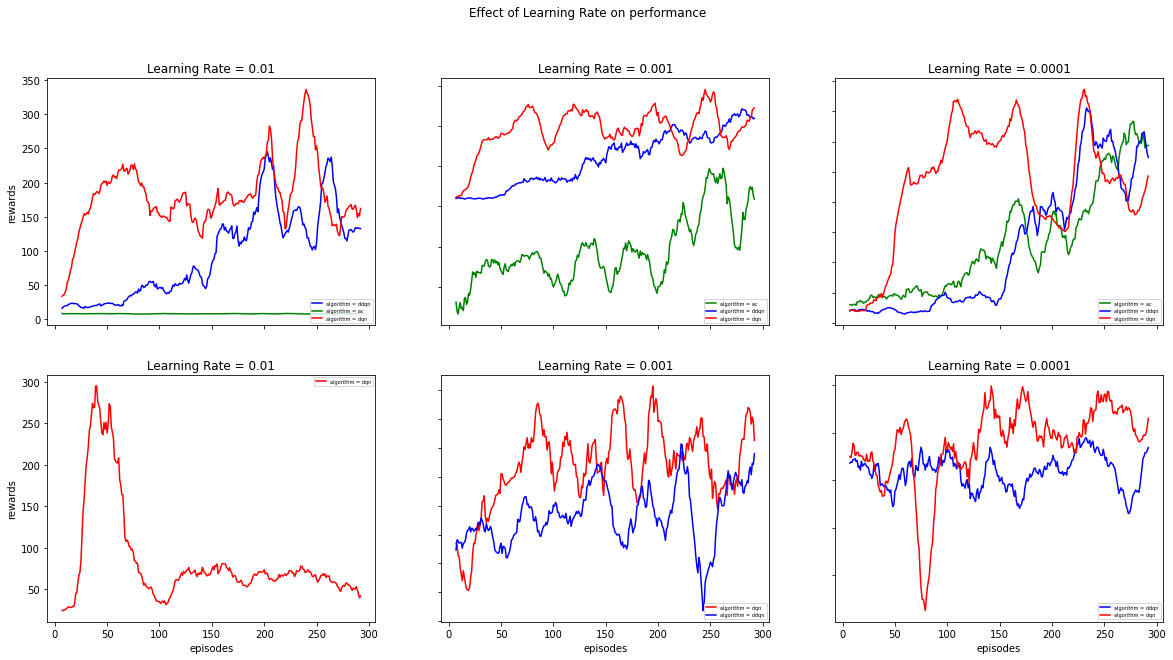

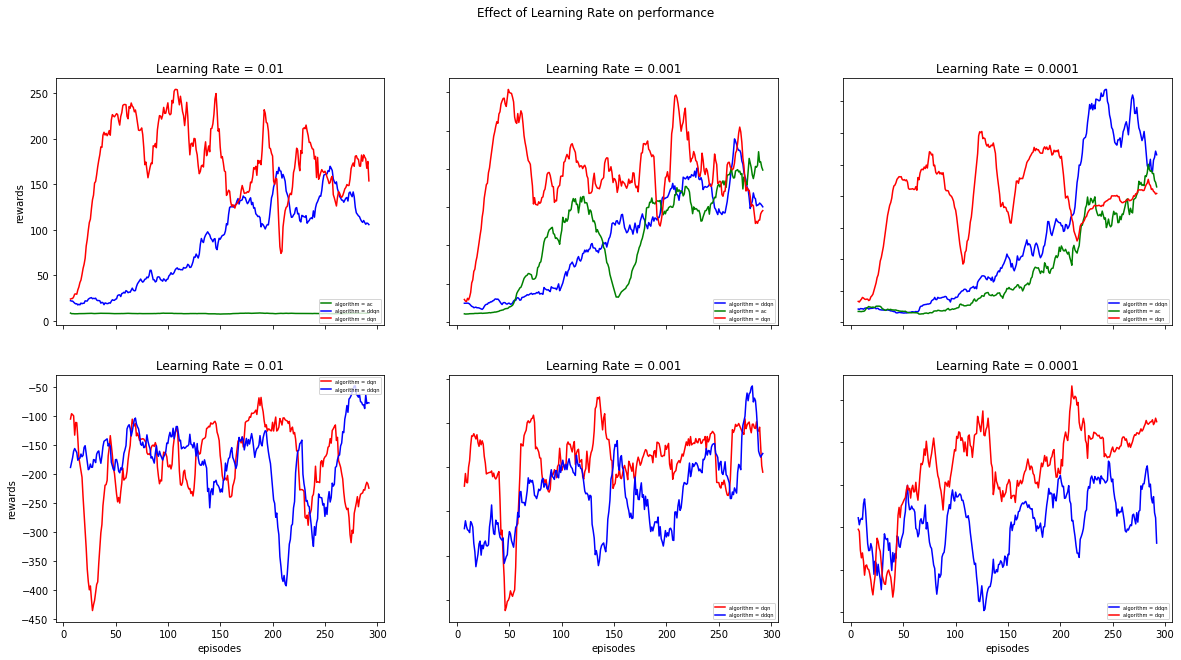

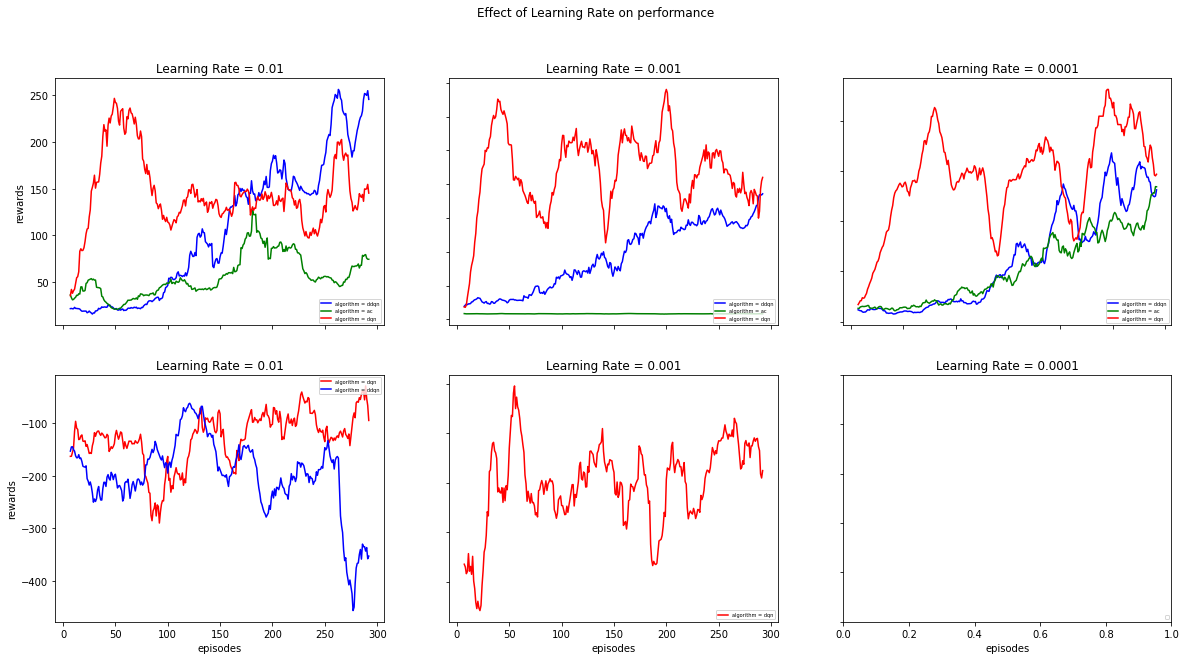

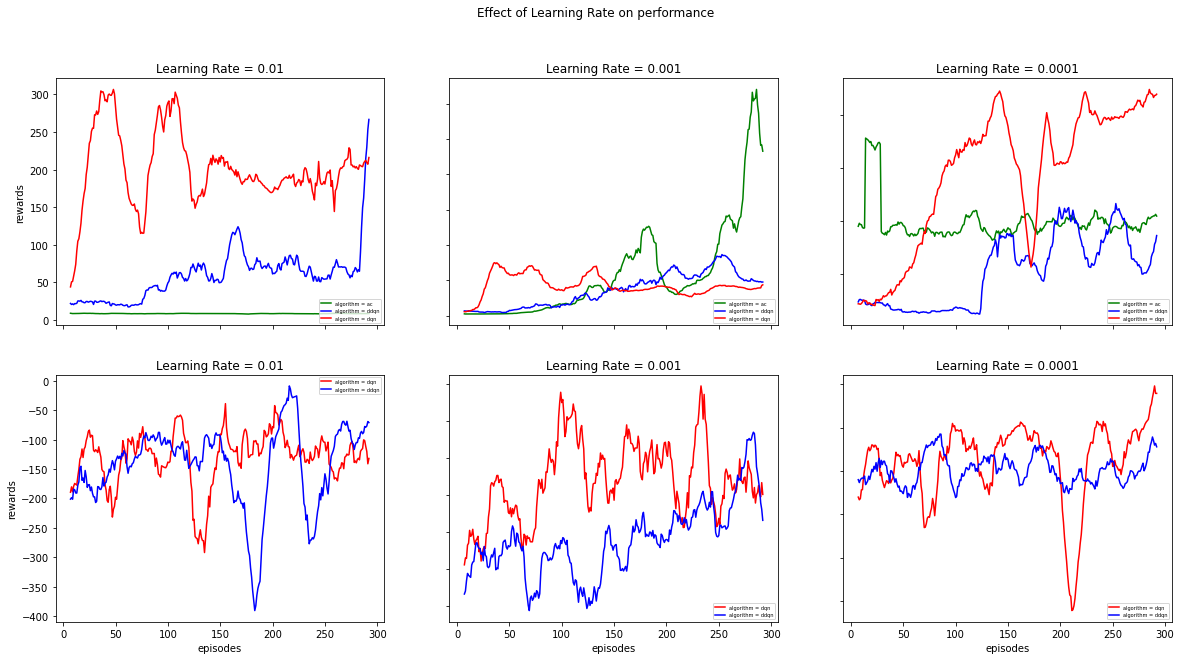

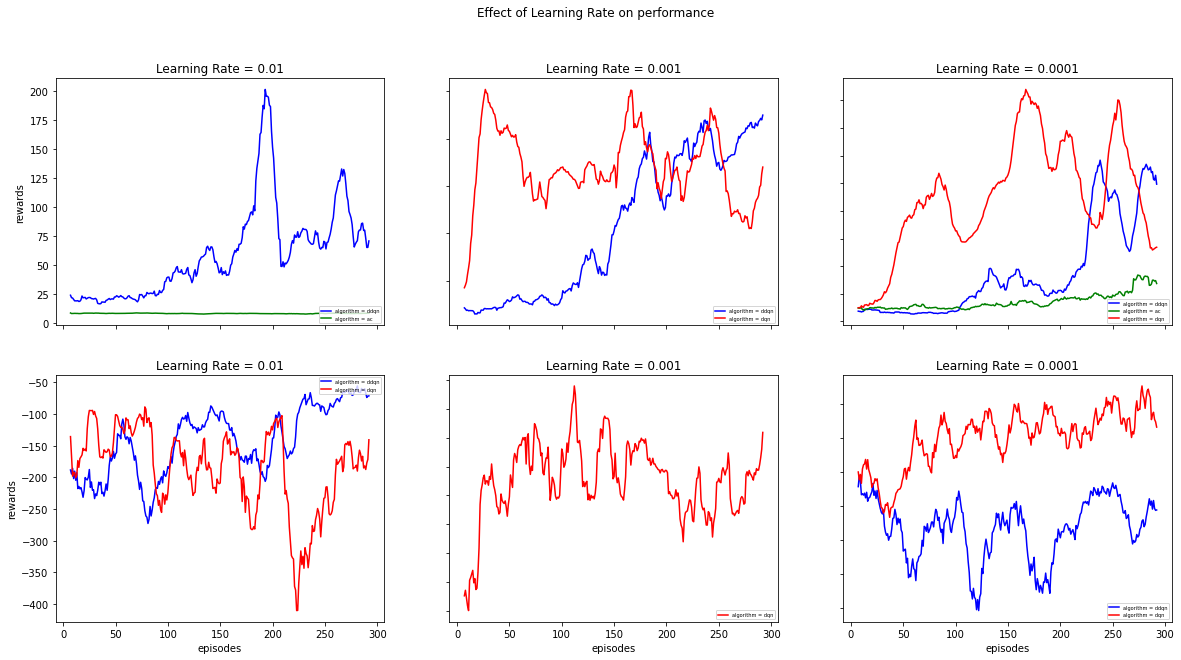

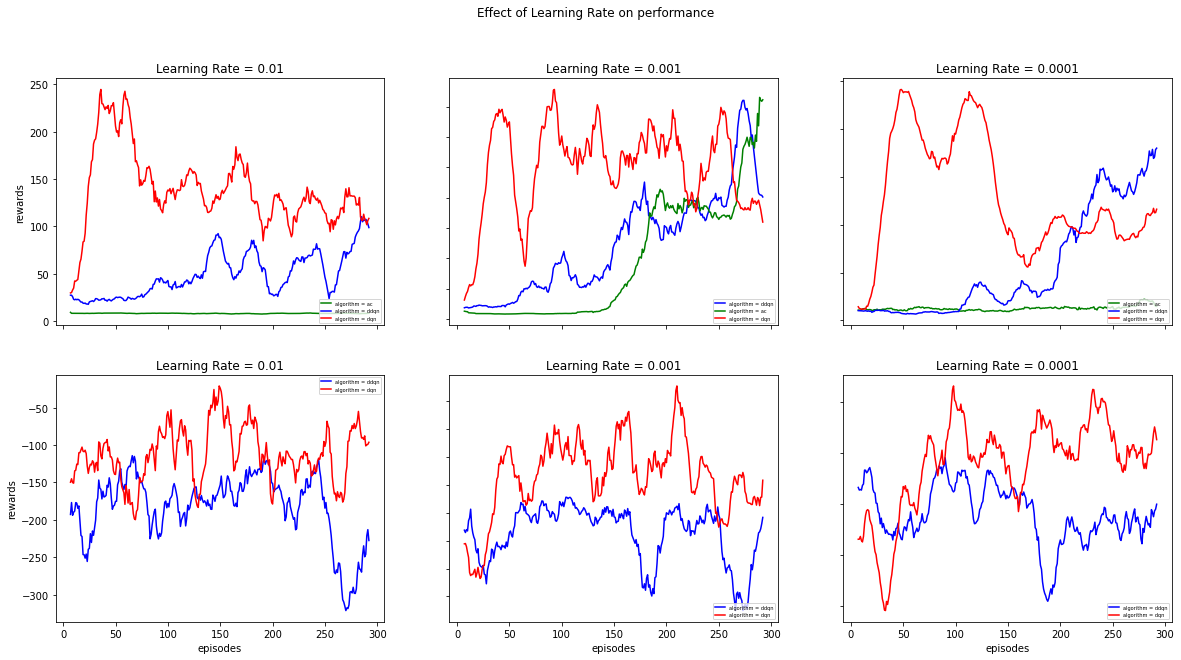

In [37]:
for n in [1, 2]:
    for g in [0.95, 0.9, 0.8]:
        plotter(slicer(config_df, episodes = 300, network = n, gamma = g))